# PProductions


Perguntas de interesse a serem respondidas:
- a.​ Qual filme você recomendaria para uma pessoa que você não
conhece?
- b.​ Quais são os principais fatores que estão relacionados com alta
expectativa de faturamento de um filme?
- c.​ Quais insights podem ser tirados com a coluna Overview? É possível
inferir o gênero do filme a partir dessa coluna?


- ​ Explique como você faria a previsão da nota do imdb a partir dos dados.
Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo
de problema estamos resolvendo (regressão, classificação)? Qual modelo
melhor se aproxima dos dados e quais seus prós e contras? Qual medida de
performance do modelo foi escolhida e por quê?

## 📚 Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

### ▶ Importação da base de dados

In [2]:
data = pd.read_csv('/content/drive/MyDrive/LH/desafio_indicium_imdb.csv')

## ▶ EDA

In [3]:
print(f'Dimensão do dataset: --> {data.shape}\nColunas: -->  {data.columns}')

Dimensão do dataset: --> (999, 16)
Colunas: -->  Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


In [4]:
data.head(3)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"


- A coluna Unnamed: 0 é a coluna de indice da base, ela não será necssária para as próximas análises, por isso foi removida do dataframe.

In [5]:
# data.drop('Unnamed: 0', axis=1, inplace=True)

- A função .info() mostra as colunas, o numero de linhas e o numero de valores não nulos presentes na base.

- Pelo saída da função, algumas features com valores numérico elas estão com o tipo de dado object, logo, é preciso realizar essa codificação para seus respectivos tipos corretos de dados ex: released_year é o ano, mas está como object, além do mais, todos os dados estarem como object aumenta muito o consumo de memoria, o que faz a transformação ainda mais necessária.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


as funções isna().sum() mostram o somatório dos campos que possuem valores NaN dentro da base de dados.
  - a feature certificate possui um total de 101 (aproximadamente 10.11%)valores NaN (not a number)
  - a feature Meta_score possui um total de 157  (aproximadamente 15.8%) valores NaN
  - a feature gross possui um total de 169 (aproximadamente 17%%) valores NaN


In [7]:
data.isna().sum()

,0
Unnamed: 0,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


- Resumo estatistico das colunas

In [8]:
data.describe()

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,999.000000,842.000000,9.990000e+02
mean,500.000000,7.947948,77.969121,2.716214e+05
std,288.530761,0.272290,12.383257,3.209126e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.500000,7.700000,70.000000,5.547150e+04
50%,500.000000,7.900000,79.000000,1.383560e+05
75%,749.500000,8.100000,87.000000,3.731675e+05
max,999.000000,9.200000,100.000000,2.303232e+06


- Verificação de duplicatas

In [9]:
data.duplicated().sum()

np.int64(0)

##
 ▶ Tratamento do Tipo de dados

 - Considerando a quantidade de valores ausentes nas colunas certicate, meta_score e gross, não posso simplemente remover da base, por que vouperder muitas informações, então vou usar técnicas de imputação com a média emediana.

 - Para as variaveis numericas gross e meta_score optei pela imutação com mediana

In [10]:
data['Released_Year'].value_counts()

,count
Released_Year,
2014,32
2004,31
2009,29
2013,28
2016,28
...,...
1920,1
1930,1
1922,1


In [11]:
data[data['Released_Year']== 'PG']

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


- Correção manual da inconsistência na base de dados. Por existir apenas uma intância inconsistente em toda a coluna Released_year, optei por tratar manualmente buscando a data de lançamento do filme apollo 13 e acrescentenadoo na base. Essa abordagem foi adotada por que existia apenas uma instância, se fossem muitas, eu teria que optar por outra ferramenta, como a função coerce do pandas e em seguida trataria os valores NaN.

In [12]:
data.loc[965, 'Released_Year'] = 1995
data['Released_Year'] = data['Released_Year'].astype(int)
data['Gross'] = data['Gross'].str.replace(',', '').astype(float)
data['Runtime'] = data['Runtime'].str.replace(' min','',regex = False ).astype(int)

In [13]:
data['Released_Year'].value_counts().tail()

,count
Released_Year,
1920,1
1926,1
1930,1
1922,1
1943,1


In [14]:
mediana_gross = data['Gross'].median()
mediana_meta_score = data['Meta_score'].median()
moda = data['Certificate'].mode()[0]

data['Gross'] = data['Gross'].fillna(mediana_gross)
data['Meta_score'] = data['Meta_score'].fillna(mediana_meta_score)
data['Certificate']= data['Certificate'].fillna(moda)

- Checagem se após a imputação restou algum valor faltante

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    int64  
 3   Certificate    999 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     999 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          999 non-null    float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.0+ KB


## ▶ Análise Univariada das features

In [16]:
data.head(2)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0


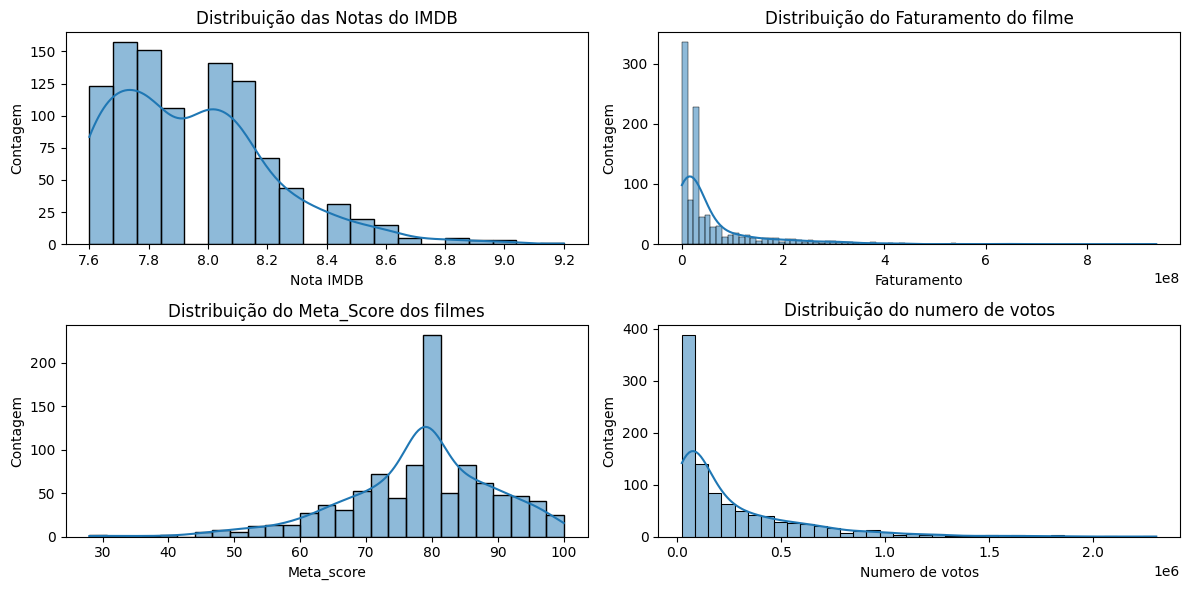

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))

sns.histplot(data=data, x='IMDB_Rating', kde=True, ax=ax[0,0])
ax[0,0].set_title('Distribuição das Notas do IMDB')
ax[0,0].set_xlabel('Nota IMDB')
ax[0,0].set_ylabel('Contagem')

sns.histplot(data=data, x='Gross', kde=True, ax=ax[0,1])
ax[0,1].set_title('Distribuição do Faturamento do filme')
ax[0,1].set_xlabel('Faturamento')
ax[0,1].set_ylabel('Contagem')

sns.histplot(data=data, x='Meta_score', kde=True, ax=ax[1,0])
ax[1,0].set_title('Distribuição do Meta_Score dos filmes')
ax[1,0].set_xlabel('Meta_score')
ax[1,0].set_ylabel('Contagem')

sns.histplot(data=data, x='No_of_Votes', kde=True, ax=ax[1,1])
ax[1,1].set_title('Distribuição do numero de votos')
ax[1,1].set_xlabel('Numero de votos')
ax[1,1].set_ylabel('Contagem')
plt.tight_layout()
plt.show()

- A feature Certificate é uma variavel categórica
- A feature Genre também é categorica, mas ela possui 202 valores unicos e são muitos para plotar em um gráfico só,além de que vários filmes possuem combinações de genero, o que pode tornar a análise tendenciosa. Vou usar a técnica de engenharia de featuring para separar estes generos.

- Considerar que um filme pode estar em vários generos

In [18]:
genres = data.copy()
genres['Genre'] = genres['Genre'].str.split(',')
genres['Genre'] = genres['Genre'].apply(lambda genre_list: [genre.strip() for genre in genre_list])
genres = genres.explode('Genre')

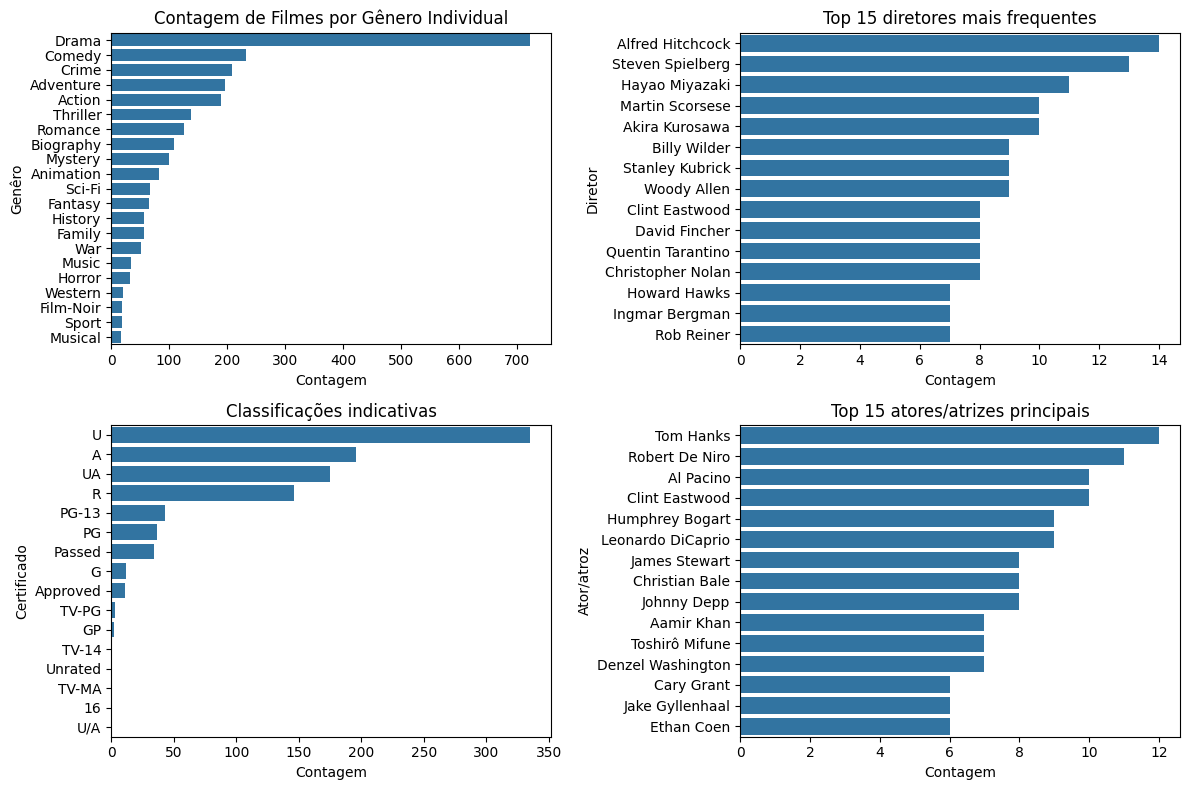

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(data= genres, y='Genre', order = genres['Genre'].value_counts().index, ax=ax[0,0])
ax[0,0].set_title('Contagem de Filmes por Gênero Individual')
ax[0,0].set_xlabel('Contagem')
ax[0,0].set_ylabel('Genêro')

sns.countplot(data=data, y='Director', order = data['Director'].value_counts().head(15).index, ax = ax[0,1])
ax[0,1].set_title('Top 15 diretores mais frequentes')
ax[0,1].set_xlabel('Contagem')
ax[0,1].set_ylabel('Diretor')

sns.countplot(data=data, y='Certificate', order = data['Certificate'].value_counts().index, ax = ax[1,0])
ax[1,0].set_title('Classificações indicativas')
ax[1,0].set_xlabel('Contagem')
ax[1,0].set_ylabel('Certificado')

sns.countplot(data=data, y='Star1', order = data['Star1'].value_counts().head(15).index, ax = ax[1,1])
ax[1,1].set_title('Top 15 atores/atrizes principais')
ax[1,1].set_xlabel('Contagem')
ax[1,1].set_ylabel('Ator/atroz')

plt.tight_layout()
plt.show()

In [20]:
# plt.figure(figsize=(10, 6))
# sns.countplot(data=data, y='Certificate', order = data['Certificate'].value_counts().index)
# plt.title('Contagem de Filmes por Gênero Individual')
# plt.xlabel('Contagem')
# plt.ylabel('Gênero')
# plt.show()

### Para quais genêros o faturamento é maior? dentro da base o genero mais frequentes de filmes é drama, isso o torna o genêro mais lucrativo?

Com base nas análises realizadas, o genêro com maior faturamento é Adventure e Sci-fi, que possuem faturamentos superios aos demais. No entando, pode - se observar que apesar do genêro Sci-fi ser o segundo com maior faturamento, ele ainda possui uma variação muito grande, fazendo com que sej auma aposta não tão segura a produção de um filme desse filme, caso o objetivo seja garantir um alto faturamtno.

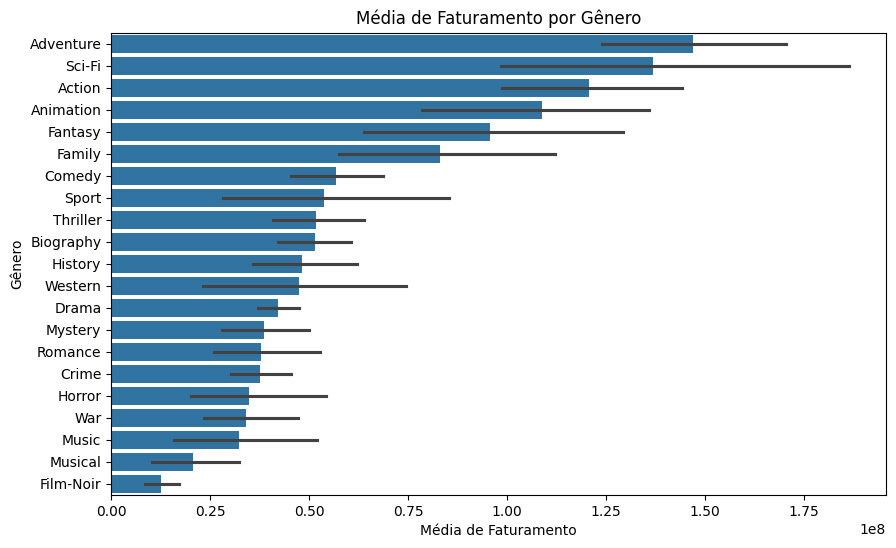

In [21]:
media = genres.groupby('Genre')['Gross'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data = genres, x= 'Gross', y='Genre', order=media.index)
plt.title('Média de Faturamento por Gênero')
plt.xlabel('Média de Faturamento')
plt.ylabel('Gênero')
plt.show()

### Quais generos possuem maior aclamação da critica na nota IMDB?

A nálise indica que filmes dos generos War, Western, Film-Noir e sci-fi possuem maior aclamação,sendo assim apostas promissoras, no entando, é preciso destacar que a variação das notas dos filmes desse genero tendem a variar de forma considerável, especialmente se tratando do genêro Western, indicando que pode ou não ser uma aposta certeira.

Desse modo, caso o estudio pode opte por correr mais riscos, uma boa escolha é produzir filmes dos genẽros citados: War, Western, Film-Noir e sci-fi , no entanto, caso o estudio esteja buscando um genêro para produção mais confiável e que possua menos variação nas notas e aclamação da critica, os genêros Drama e comedy são os mais indicados.


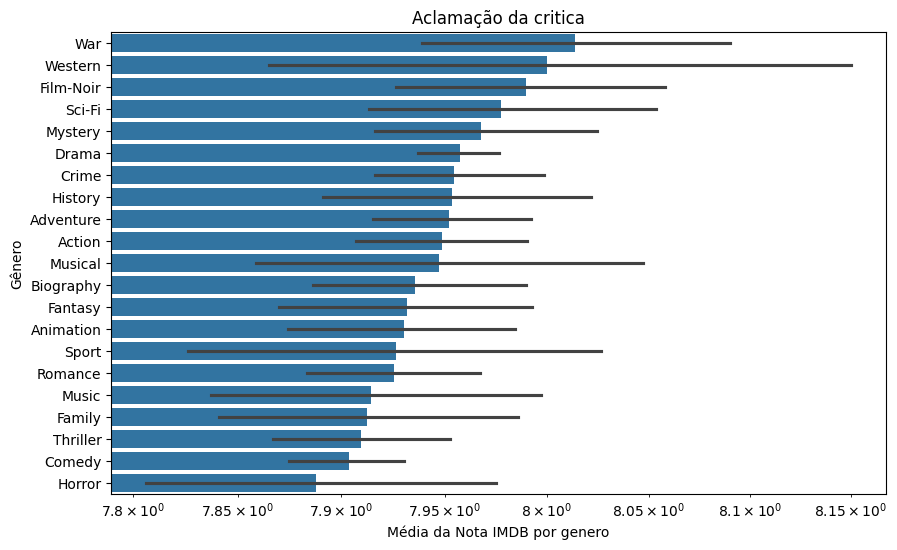

In [22]:
media = genres.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data = genres, x= 'IMDB_Rating', y='Genre', order=media.index)
plt.title('Aclamação da critica')
plt.xlabel('Média da Nota IMDB por genero')
plt.xscale('log')
plt.ylabel('Gênero')
plt.show()

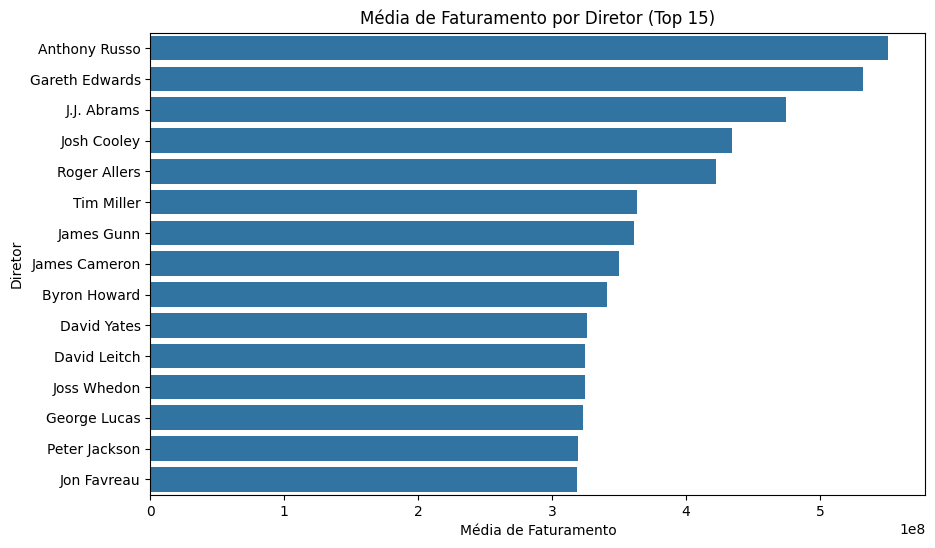

In [41]:
media_por_diretor = data.groupby('Director')['Gross'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=media_por_diretor.values, y=media_por_diretor.index)
plt.title('Média de Faturamento por Diretor (Top 15)')
plt.xlabel('Média de Faturamento')
plt.ylabel('Diretor')
plt.show()

### A duração de um filme influência na nota?

A inclinação da linha de tendência indica que há uma correlação positiva entre as duas variaveis, então, a duração de um filme tem impacto na nota do IMDB, ou seja, filmes mais longos tendem a ter notas mais altas, porém é um impacto moderado, considerando que os pontos estão espelhados e situados na parte esquerda do gráfio, logo, um filme ser longo não implica necessariamente que ele será bem avaliado.

Olhando para o eixo y, para os filmes que possuem nota a partir de 8.5, é possivel observar que eles possuem uma duração na faixa de 120min a 220min, o que pode indicar que o tempo médio ideal de um filme para que ele obtenha uma boa nota (a somar com sa demais variaveis que influenciam a nota) é de 120 a 220 min.

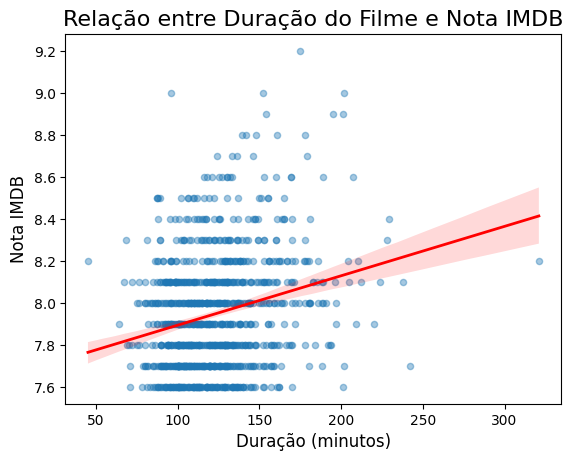

In [23]:
sns.regplot(data=data,x='Runtime', y='IMDB_Rating',scatter_kws={'alpha': 0.4, 's': 20}, line_kws={'color': 'red', 'linewidth': 2})
plt.title('Relação entre Duração do Filme e Nota IMDB', fontsize=16)
plt.xlabel('Duração (minutos)', fontsize=12)
plt.ylabel('Nota IMDB', fontsize=12)
plt.show()

### Existem um relação entre o numero de votos e o tempo de duração de um filme?

A partir das análises realizadas, a duração de um filme não implica em popularidade. A grande maioria dos filmes se concentra na faixa de tempo entre aproximadamente 80 e 170 minutos e possuem numero de votos até 1 milhão. Porém, uma quantidade considerável de filmes possui de 140 a 220 min que possuem mais de 1 milhão de votos, isso pode indicar um intervalo de tempo de sucesso de filmes, onde eles não são nem tão curtos e nem tão longos e possuem uma grande quantidade de votos.

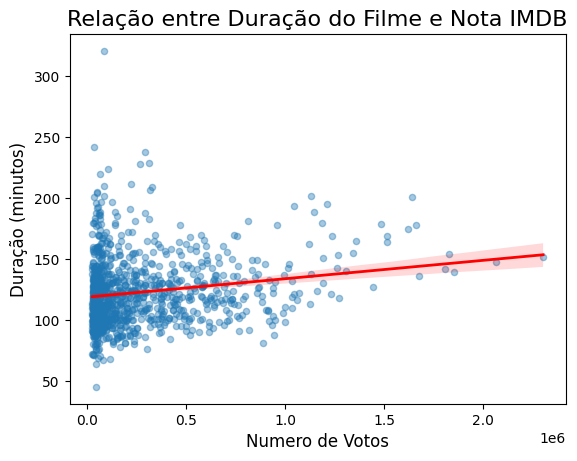

In [24]:
sns.regplot(data=data,x='No_of_Votes', y='Runtime',scatter_kws={'alpha': 0.4, 's': 20}, line_kws={'color': 'red', 'linewidth': 2})
plt.title('Relação entre Duração do Filme e Nota IMDB', fontsize=16)
plt.xlabel('Numero de Votos', fontsize=12)
plt.ylabel('Duração (minutos)', fontsize=12)
# plt.xscale('log')
plt.show()

In [25]:
data['No_of_Votes'].min()

25088

### O numero de votos influência na nota do IMDB?

A análise indica que há uma correlação positiva e forte entre o numero de votos de um filme e altas notas de IMDB. Essa análise indica que quanto mais popular o filme é, mais qualidade o público percebeu na produção. Portanto, o estudio PProductios, para produzir um filme que atenda as demandas do público e tenha altas notas, deve focar em produções de qualidade que mantenham o público entretido, fazendo assim com eles tenham mais votos.

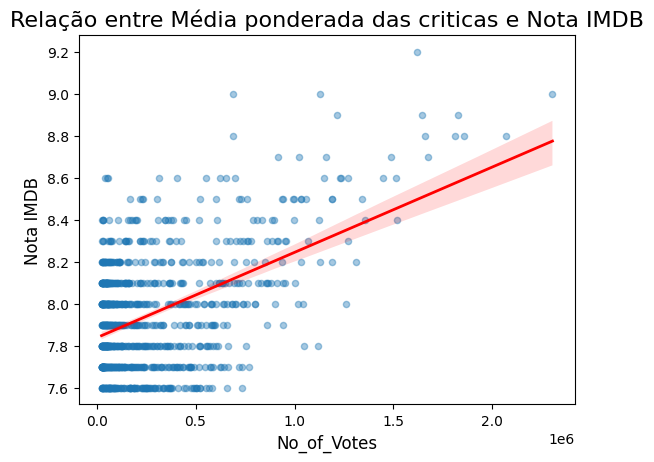

In [26]:
sns.regplot(data=data,x='No_of_Votes', y='IMDB_Rating',scatter_kws={'alpha': 0.4, 's': 20}, line_kws={'color': 'red', 'linewidth': 2})
plt.title('Relação entre Média ponderada das criticas e Nota IMDB', fontsize=16)
plt.xlabel('No_of_Votes', fontsize=12)
plt.ylabel('Nota IMDB', fontsize=12)
plt.show()

### Filmes com alto faturamente possuiram notas mais IMDB mais alta?

A correlação entre faturamento e notas IMDB é uma correlação posisita, porém fraca, como é visivel pela inclinação mais suave da linha de tendência paresentada no gráfico. A grande maioria dos filmes está situada na parte esquerda do gráfico, com notas IMDB altas e faturamento inferior a 200 milhões. Isso indica que um filme bem aclamado pela critica (alta pontuação IMDB) não necessáriamente possuirá um alto fatiramento, apesar da correlação fraca que indica que filmes com maores notas tendem a ter maior faturamento.

Essa análise indica que outras features podem também contribuir para o faturamento do filme, como por exemplo, o ator Tom Hanks estar no elenco, como já apresentei em outra análise.

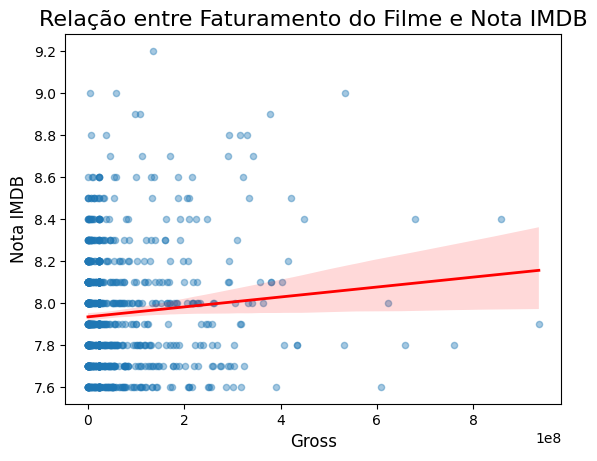

In [27]:
sns.regplot(data=data,x='Gross', y='IMDB_Rating',scatter_kws={'alpha': 0.4, 's': 20}, line_kws={'color': 'red', 'linewidth': 2})
plt.title('Relação entre Faturamento do Filme e Nota IMDB', fontsize=16)
plt.xlabel('Gross', fontsize=12)
plt.ylabel('Nota IMDB', fontsize=12)
plt.show()

### Correlação de Pearson entre as variaveis numéricas,

In [28]:
data = data.drop('Unnamed: 0', axis=1)

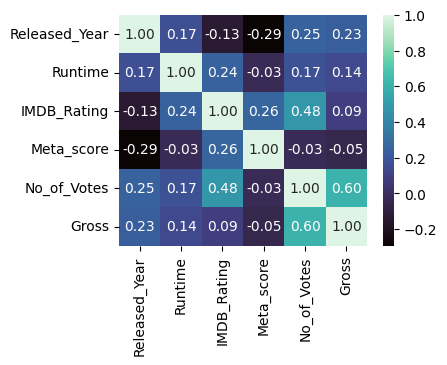

In [29]:

num_colunas = data.select_dtypes(include = ['number'])
corr = num_colunas.corr()

plt.figure(figsize=(4, 3))
sns.heatmap(corr,annot = True,cmap='mako',fmt = '.2f')

plt.show()

### Qual o impacto que a duração dos filmes tem na nota IMDB nos generos mais aclamados (Drama e comédia)?

Com base na análise realisada para os dois generos identificados como os mais aclamados, existe uma correlação positiva entre a nota do IMDb e o tempo de duração dos filmes. Com base na análise gráfica abaixo, filmes de comédia tendem a ter maior variação no tempo, em compraçaõ ao filmes de Drama, que possuem um intervalo menor.

Observa-se na análise que a duração dos filmes tem maior impacto na nota dos filmes de drama, que apresentam uma linha de tendencia com inclinação mais ingrime do que a do genero comedia.  Isso sugere que, para um Drama, a duração extra é mais crucial para a qualidade, talvez permitindo o desenvolvimento de personagens complexos ou tramas mais profundas, o que é recompensado pelos críticos e pelo público.

Para a produção de filmes de drama pelo estudio, a indicação é qeu eles possuam tempo de duração entre 100 e 240, pois essa é uma zona de tempo de sucesso para a produção de um filme aclamado.

<Figure size 1000x600 with 0 Axes>

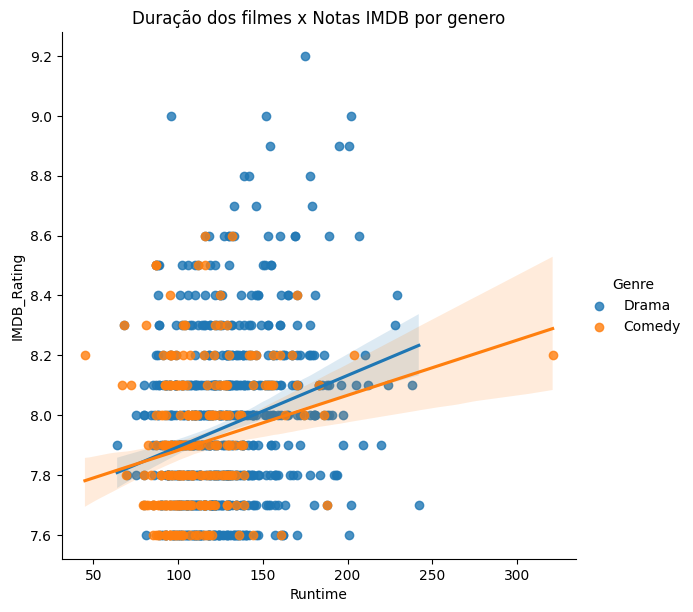

In [33]:
top_10 = top_10 = genres['Genre'].value_counts().head(2)
filter = genres['Genre'].isin(top_10.index)
filter = genres[filter]
plt.figure(figsize=(10, 6))
sns.lmplot(data = filter, x='Runtime',y='IMDB_Rating',hue='Genre', height =6)
plt.title('Duração dos filmes x Notas IMDB por genero')
plt.show()


### A presença de um ator famoso tem relação com o faturamento e aclamação da critica de um filme?

Relizada a análise utilizando as notas do IMDB e faturamento para os top 5 atores mais aclamados, conclue-se a apresença de atores com carreiras consolidadas, a exemplo o Tom Hanks, Al pacino e Robert de Niro, tem impacto direto no fatiramento. Em especial, o ator Tom Hanks que apresenta histórico de estrelar filmes com notas altas (entre 7.9 e 8.9) e alto faturamento, indicando sucesso das produções nas quais ele está presente.

A sugestão para a PProductions é que, se a intenção for produzir um filme com o objetivo de consguir altos faturamentos acompanhado de altas notas e aprovação, a escolha ideal é que o ator Tom Hanks seja a estrela principal do filme.


<Figure size 1000x600 with 0 Axes>

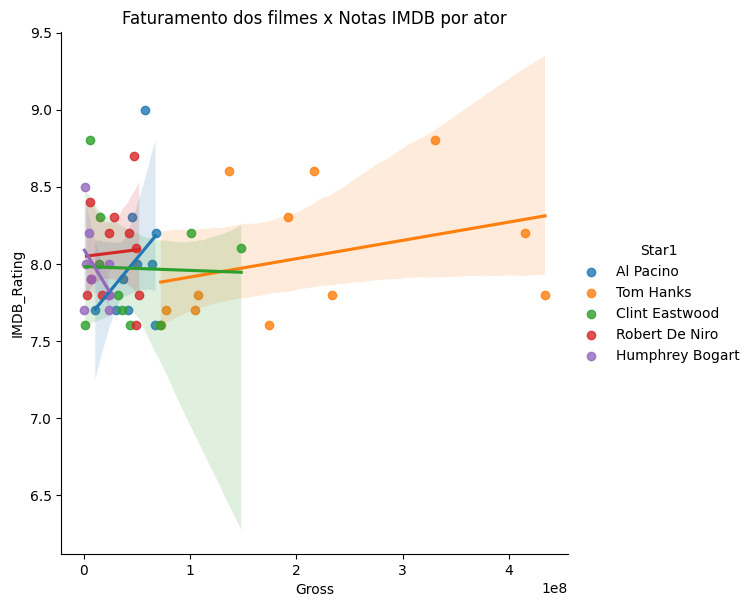

In [31]:
top_15 = data['Star1'].value_counts().head(5)
filter = data['Star1'].isin(top_15.index)
filter = data[filter]

plt.figure(figsize=(10, 6))
sns.lmplot(data = filter, x='Gross',y='IMDB_Rating',hue='Star1', height =6)
plt.title('Faturamento dos filmes x Notas IMDB por ator')
plt.show()

In [32]:
data.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


# Respostas: Questão 2

## Qual filme eu recomendaria para alguém que eu não conheço? R = **Forrest Gump**


Para alguém que eu não conheço eu recomendaria um filme aclamado pela critica com uma nota IMDB alta, além de uma média ponderada das criticas também alta, qeu estivesse enquadrado nos genêros Drama, Comedy ou Adventure que são os mais aclamados de acordo com as análises realizadas, além de considerar de forma importante o número de votos que um filme recebeu, isso indica a sua aclamação pública: quanto maior o numero de votos, mais aclamado o filme, além dos filmes com Tom Hanks ou Robert de Niro como ator principal.

Considerando todos esses requisitos, o filme que eu reccomendaria é **Forrest Gump**

In [37]:
nota = (data['IMDB_Rating'] >= 8.5) & (data['Meta_score'] >= 80)
genero = data['Genre'].str.contains('Drama|Comedy|Adventure')
votos = data['No_of_Votes'] >= 1000000
ator = data['Star1'].isin(['Tom Hanks', 'Robert De Niro'])

recomendacao = data[nota & genero & votos & ator]
recomendacao[['Series_Title', 'Released_Year', 'Genre', 'IMDB_Rating', 'No_of_Votes', 'Director', 'Star1', 'Gross']]

,Series_Title,Released_Year,Genre,IMDB_Rating,No_of_Votes,Director,Star1,Gross
10,Forrest Gump,1994,"Drama, Romance",8.8,1809221,Robert Zemeckis,Tom Hanks,330252182.0
14,Goodfellas,1990,"Biography, Crime, Drama",8.7,1020727,Martin Scorsese,Robert De Niro,46836394.0
23,Saving Private Ryan,1998,"Drama, War",8.6,1235804,Steven Spielberg,Tom Hanks,216540909.0


## Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?


A partir das análises realizadas, conclui-se que os principais fatores que estão relacionados a altos indices de fatiramento de uma produção são diversos: Altas notas de IMDB, numero de votos e  Meta Score estão associados com o alto faturameto, assim como o genero do filme, como apresentamos que genêros como Adventure, Sci-fi, Action, Animation e Fantasy estão associados aos maiores indices de faturamento. A presença de determinados atores possuem relação forte com o alto faturamento, como apresentamos os filmes estrelados por Tom Hanks e Robert De Niro.

## 2.c.1: Quais insights podem ser tirados com a coluna Overview?

A partir da coluna overview que é a coluna que apresenta a sinopse do filme, diversos insights podem ser tirados, como por exemplo, o genero do filme, a classificação indicativa também é um exemplo de insigth qu epode ser retirado. Por se tratar de uma coluna cujo conteúdo é textual, precisariamos  implementar e treinar um modelo de Machine Learning para processamento de linguagem natural (NLP), e a partir daí realizar diversas análises: como por exemplo, para retirar o genêro como insight uma boa aborgadem é utilizar o modelo para análisar a freqeuncia do uso de determinadas palavras, como "amor", "perda", etc, para filmes de drama, e assim por diante. Para retirar a classificação indicativa, poderia ser utilizado um modelo que a partir do teor das palavras utilizadas na sinopse (palavras de teor sexual, animação, morte, adultos) iria inferir a classificação indicativa do filme. Portanto, Sim, diversos insights podem ser retirados da coluna overview.

##2.c.2: É possível inferir o gênero do filme a partir dessa coluna?

Sim, é possível inferir o genêro do filme a partir dessa coluna. Como mencionado anteriormente, poderiamos implementar e treinar um modelo de machine learning para o processamento de linguagem natural. O modelo seria treinado utilizando as sinopses dos filmes e a coluna genre, para que durante o treinamento ele aprendesse a associar determinada frequência ou uso de palavras a determinados genêros, e assim, na etapa de testes o modelo seria capaz de inferir o ganêro do filme a partir da coluna overview.  

# Explique como você faria a previsão da nota do imdb a partir dos dados.Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

A nota do IMDB é um valor contínuo, logo, é também um problema de regressão.Para resolver esse problema o correto é utilizar modelos de machine learning para resolver problemas de regressão (KNNregressor, random forest regressor, etc). A partir das análises realisadas na etapa de análise exploratória, as váriaveis que apresentaram maior correlação com a coluna IMDB_Rating foram as colunas: No_of_votes, runtime, Gross, genre, star1 e director, então, para prever a nota do IMDB eu utilizaria as variaveis citadas como variaveis independentes (X) e a coluna IMDB_Rating como variável alvo (y).

No entando, as colunas genre, star1 e director são colunas cujo conteudo é textual, logo, para utilizá-las em um modelo de machine learning eu precisaria codificá-las para ques elas ficassem em um formato numérico (formato aceito pelos modelos). Para esse codificação, eu utilizaria a técnica One_hot_encoding com técnicas de engenharia de featuring. Para que isso, assim como realizei anteriormente a "explosão" do dataset oridiginal, criando o dataset (genres), onde estão os filmes separados por genre individual (21 generos), a melhor solução é criar colunas binárias para codificar o genero dos filmes, para que asim o modelo tenha acesso ao genero individual dos filmes e não apenas ás combinações, isso evita o overfiting. Usaria essa écnica para todas as colunasgenre, star1 e director.

Acredito que não exista um modelo ideal,porém, para resolver esse problema eu selecionaria o modelo Random Forest Regressor,  tendo como pró a simplicidade e robustez do modelo, e como contra a dificuldade de interpretaçao. Porém, o modelo apresenta formas de mostramos o gráfico da importência das variáveis, logo, poderiamos saber o que mais influênciou na decisão.

Em seguida, treinaria o modelo utilizando conjuntos de treino e teste e utilizaria métricas de avaliação dele, paea saber o quão bom o modelo se comportou e se ajustou aos dados. Como métrica de avaliação, utilizaria o RMSE, pois além de ser umas das métricas mais utilizadas para avaliar modelos de regressão, ela também é uma das mais confiáveis.



## Implementação do Modelo de Regressão

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [45]:
numerical_features = ['IMDB_Rating', 'No_of_Votes', 'Gross', 'Runtime', 'Meta_score']
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].median())

In [49]:
genres_unicos = data['Genre'].str.split(', ').explode().str.strip().unique()
for genre in genres_unicos:
    data[f'is_{genre}'] = data['Genre'].str.contains(genre, regex=False).astype(int)

In [54]:
diretores = data['Director'].value_counts().head(15).index.tolist()
for director in diretores:
    data[f'dir_{director}'] = (data['Director'] == director).astype(int)


stars = data['Star1'].value_counts().head(15).index.tolist()
for star in stars:
    data[f'star_{star}'] = (data['Star1'] == star).astype(int)

data['dir_Others'] = data['Director'].apply(lambda x: 0 if x in diretores else 1)
data['star_Others'] = data['Star1'].apply(lambda x: 0 if x in stars else 1)

In [58]:
features = ['No_of_Votes',
    'Gross',
    'Meta_score',
    *[col for col in data.columns if col.startswith('is_')],
    *[col for col in data.columns if col.startswith('dir_') and col != 'dir_Other'],
    *[col for col in data.columns if col.startswith('star_') and col != 'star_Other']
]

target = 'IMDB_Rating'

X = data[features]
y = data[target]


- Variaveis independentes e preditivas

In [ ]:
X.columns.tolist()

- variavel alvo

In [ ]:
y

- Divisão dos dados em treino e teste, com metodologia 80-20

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("\nTreinamento concluido")


Treinamento concluido


In [69]:
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

In [70]:
print(f"\nRMSE do modelo: {rmse:.4f}")


RMSE do modelo (erro médio na escala do IMDB): 0.2080


## O modelo apresentou performance excelente, considerando para a interpretação do resultado que:

a escala das notas de IMDB é de 1 a 10, e que o resultado do RMSE está na mesma escala da variavel alvo, ou seja, o modelo está erradndo previsões no conjunto de teste por apenas 0.21 pontos na escala IMDB. Isso torna a performance do modeo excelente, e poderia vir a ser aprimorada utilizando ferramentas de aprimoramento de hiperparâmetros (como ao gridserach).






In [72]:
sample_index = np.random.randint(0, len(y_test))
true_rating = y_test.iloc[sample_index]
predicted_rating = predictions[sample_index]

print(f"\nExemeplo de previsão feita pelo modelo")
print(f"Nota real do filme: {true_rating:.2f}")
print(f"Nota prevista pelo modelo: {predicted_rating:.2f}")


Exemeplo de previsão feita pelo modelo
Nota real do filme: 7.90
Nota prevista pelo modelo: 7.98


# Supondo um filme com as seguintes características:
{'Series_Title': 'The Shawshank Redemption',
'Released_Year': '1994',
'Certificate': 'A',
'Runtime': '142 min',
'Genre': 'Drama',
'Overview': 'Two imprisoned men bond over a number of years,
finding solace and eventual redemption through acts of common
decency.',
'Meta_score': 80.0,
'Director': 'Frank Darabont',
'Star1': 'Tim Robbins',
'Star2': 'Morgan Freeman',
'Star3': 'Bob Gunton',
'Star4': 'William Sadler',
'No_of_Votes': 2343110,
'Gross': '28,341,469'}
Qual seria a nota do IMDB?

Com base nas caracteristicas do filme e a confiabilidade do modelo, a nota IMDB do filme seria algo em torno de 9.2 pontos

# Salvando o modelo

In [73]:
import joblib

filename = '/content/drive/MyDrive/LH/modeloRF_imdb_rating.pkl'
joblib.dump(model, filename)
print(f"Modelo salvo com sucesso no arquivo '{filename}'")



Modelo salvo com sucesso no arquivo '/content/drive/MyDrive/LH/modeloRF_imdb_rating.pkl'
